In [1]:
#imports needed to complete the assignment
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
#importing the attrition data and inspeting it
telco_data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('max_column', None)
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco_data.shape

(7043, 21)

In [7]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telco_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 1. Which 2 demographics have proven to be the most popular with the telco brand?

In [34]:
telco_demographics = telco_data[["gender", "SeniorCitizen", "Partner", "Dependents", "Churn"]]
telco_demographics.head()

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,No,No
1,Male,0,No,No,No
2,Male,0,No,No,Yes
3,Male,0,No,No,No
4,Female,0,No,No,Yes


In [41]:
telco_demographics[["SeniorCitizen"]].value_counts() #non-senior citizens like the brand more than the senior citizen

SeniorCitizen
0                5901
1                1142
dtype: int64

In [42]:
telco_demographics[["gender"]].value_counts() #slightly higher males than females like the telcom brand

gender
Male      3555
Female    3488
dtype: int64

In [43]:
telco_demographics[["Partner"]].value_counts() #more people with partners like the telco brand

Partner
No         3641
Yes        3402
dtype: int64

In [44]:
telco_demographics[["Dependents"]].value_counts() #more people with dependents like the telco brand

Dependents
No            4933
Yes           2110
dtype: int64

<AxesSubplot:xlabel='SeniorCitizen'>

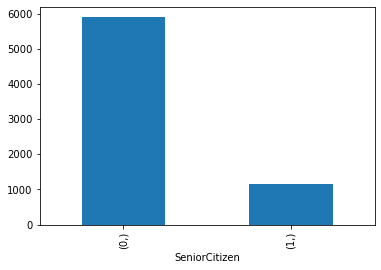

In [39]:
telco_demographics[['SeniorCitizen']].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

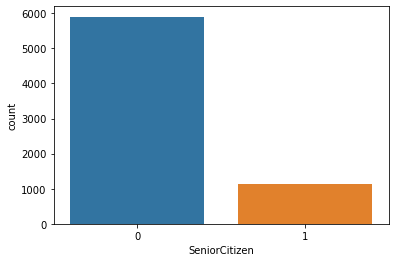

In [14]:
sns.countplot(data=telco_data, x="SeniorCitizen")
#The telco brand is popular with non-senior citizen demographics
#The brand is also more popular with men than women

<AxesSubplot:xlabel='gender', ylabel='count'>

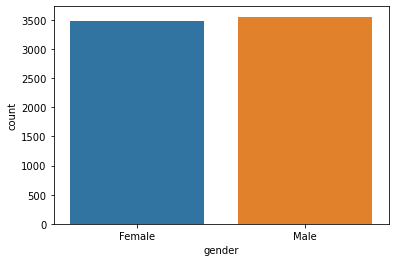

In [15]:
sns.countplot(data=telco_data, x="gender")

### b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [17]:
#churners count
telco_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
#proportion of churners
(telco_data["Churn"].value_counts()/len(telco_data["Churn"]))*100 #~27% of the customers are churners

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [51]:
telco_data.groupby(["gender"])["Churn"].value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

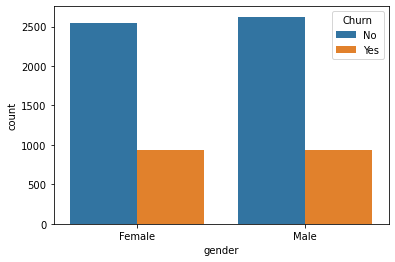

In [20]:
sns.countplot(data=telco_data, x="gender", hue ="Churn") 
#female and male churners have similar proportions hence not a good target for the marketing campaign

In [53]:
telco_data.groupby(["SeniorCitizen"])["Churn"].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

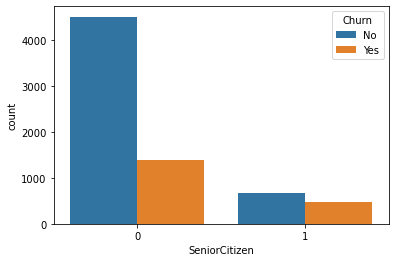

In [21]:
sns.countplot(data=telco_data, x="SeniorCitizen", hue ="Churn") 
#The proportion of churners among the senior citizens is very high hence the marketing strategy should target this demographic

In [54]:
telco_data.groupby(["Partner"])["Churn"].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

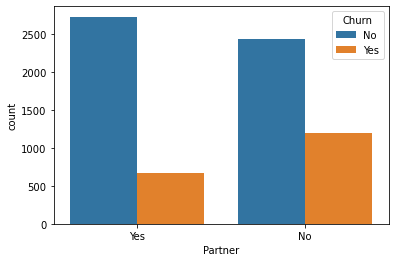

In [23]:
sns.countplot(data=telco_data, x="Partner", hue="Churn")
#when a customer has no partner, they are more likely to churn

In [55]:
telco_data.groupby(["Dependents"])["Churn"].value_counts()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

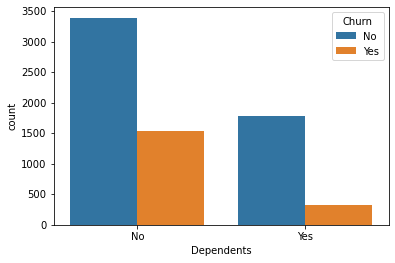

In [69]:
sns.countplot(data=telco_data, x="Dependents", hue="Churn")
#less likely to churn when you have dependents

# Services:

### a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

In [56]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
telcom_services = telco_data[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']]
telcom_services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [83]:
telcom_services['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telcom_services['Churn'].replace(to_replace='No',  value=0, inplace=True)
telcom_services.head()

C:\Users\krksam004\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,0
1,Yes,No,DSL,Yes,No,Yes,No,No,No,0
2,Yes,No,DSL,Yes,Yes,No,No,No,No,1
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0
4,Yes,No,Fiber optic,No,No,No,No,No,No,1


In [84]:
telcom_services_dummies = pd.get_dummies(telcom_services)
telcom_services_dummies.head()

,Churn,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


<AxesSubplot:>

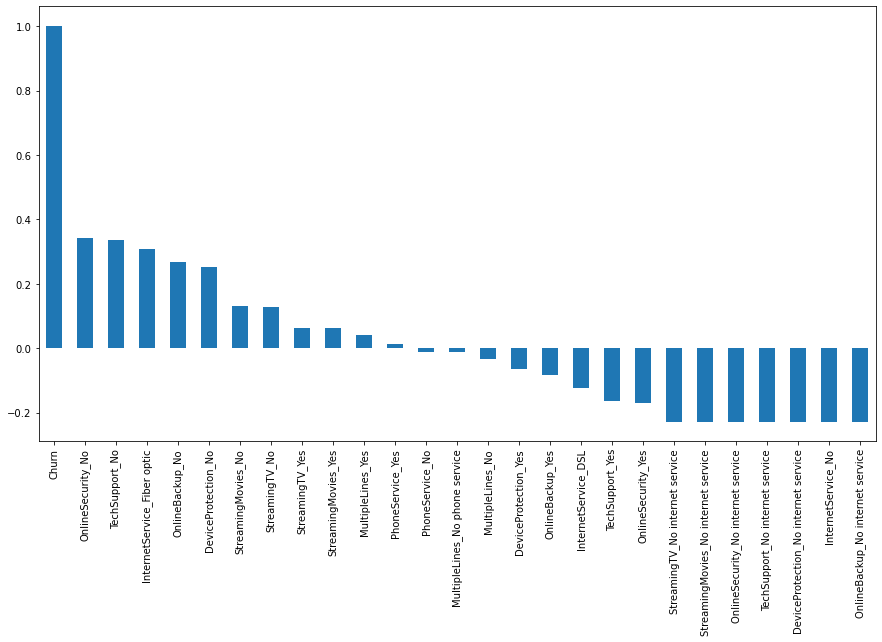

In [87]:
plt.figure(figsize = (15,8))
telcom_services_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind = 'bar') #internet fibre optic, Streaming Tv and streaming Movies seems to correlate with more churn

### b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

<AxesSubplot:xlabel='Contract', ylabel='count'>

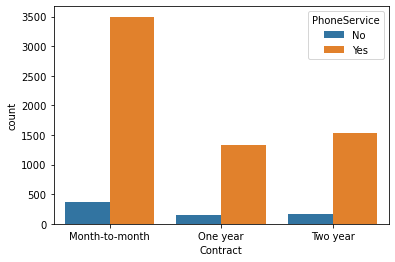

In [88]:
sns.countplot(data=telco_data, x="Contract", hue="PhoneService") #month to month contract would encourage more customer retention

# 3. Payment: (Use visualizations in explaining your analysis)
### a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic
ii. Plus
iii. Premium

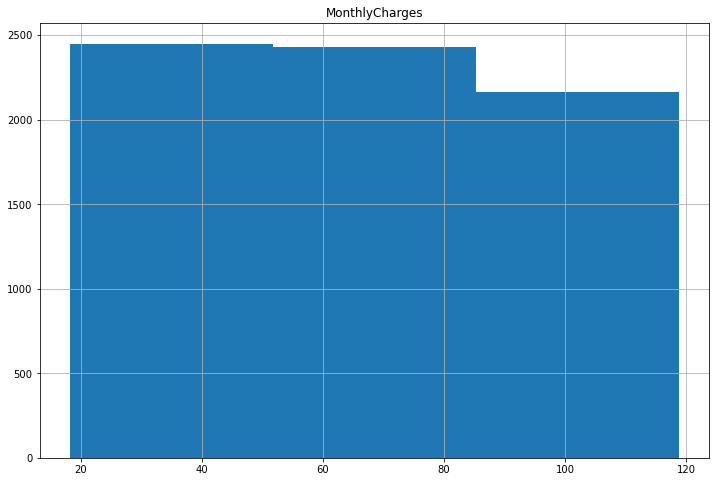

In [97]:
ax = telco_data.hist(column = "MonthlyCharges", bins=3, grid = True, figsize=(12,8))

### b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

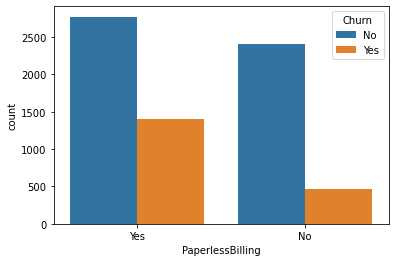

In [99]:
sns.countplot(data=telco_data, x="PaperlessBilling", hue="Churn"). #it will be ill-adviced to go strickly paperless as the proportion of churners are in the paperless billing category.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

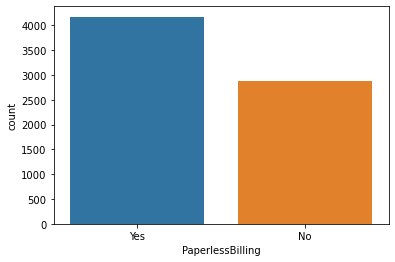

In [100]:
sns.countplot(data=telco_data, x="PaperlessBilling") 